## eyes 전처리 시작

In [1]:
import pandas as pd

In [2]:
df_eyes=pd.read_csv('../../datasets/reviews_data/eyes.csv')

### 불용어 처리 및 한글자 살리기 및 단어 치환

#### 전처리 필요한 파일들 가져오기

In [3]:
# 불용어 
df_stop = pd.read_excel('../../datasets/dic/stopword_list.xlsx')
df_stop[-2:]

,stopword
1177,\r\n
1178,\n


#### 전처리 시작 
- 1. 형태소 분석 및 토큰화
- 2. 단어 치환
- 3. 불용어 처리

In [ ]:
from konlpy.tag import Okt
from collections import Counter

# Okt 형태소 분석기 인스턴스 생성
okt = Okt()

# df_all['reveiw_replaced'] 열의 각 텍스트에 대해 중복 단어 제거 및 형태소 분석 수행
tokenized_reviews = []

# 필요한 품사 리스트 정의
desired_pos = ['Noun', 'Verb', 'Adjective', 'Adverb', 'Exclamation', 'Conjunction']

# 형태소 분석 결과를 담을 리스트 초기화
tokenized_reviews = []

for review_text in df_eyes['review_content']:
    try:
        # 형태소 분석 수행
        pos_result = okt.pos(review_text, norm=True, stem=True)
        
        # 필요한 조건을 만족하는 단어 선택
        filtered_tokens = []
        for word, pos in pos_result:
            if pos in desired_pos and len(word) > 1:
                filtered_tokens.append(word)
                    
        tokenized_reviews.append(filtered_tokens)  # 각 토큰을 개별 항목으로 유지
    except:
        pass

In [5]:
# 데이터프레임 df_all의 행 수 확인
df_all_shape = df_eyes.shape[0]

# tokenized_reviews 리스트의 길이 확인
tokenized_reviews_length = len(tokenized_reviews)

# 데이터프레임 df_all과 tokenized_reviews의 크기 비교
if df_all_shape == tokenized_reviews_length:
    print("데이터프레임 df_all과 tokenized_reviews의 크기가 일치합니다.")
else:
    print("데이터프레임 df_all과 tokenized_reviews의 크기가 일치하지 않습니다.")
    print(f"df_all의 행 수: {df_all_shape}")
    print(f"tokenized_reviews의 길이: {tokenized_reviews_length}")

데이터프레임 df_all과 tokenized_reviews의 크기가 일치합니다.


In [6]:
df_eyes['reveiw_replaced']=tokenized_reviews

In [7]:
# # 내용의 토큰화 먼저_healthapp 복사
# from mecab import MeCab
# mecab = MeCab()
# from konlpy.tag import Okt
# okt = Okt()
# stop=df_stop['stopword'].tolist()
# oneword=df_oneword['one_char_keyword'].tolist()

In [8]:
# 불용어 목록을 리스트로 변환
stop_list = df_stop['stopword'].tolist()

# 불용어 처리 함수 정의
def stopword(tokens):
    removed_tokens = [word for word in tokens if word not in stop_list]
    return ' '.join(removed_tokens)

In [9]:
# df_all['origin_reviews'] 열의 각 리스트에 불용어 처리 적용하고 쪼개기
df_eyes['replaced_review'] = df_eyes['reveiw_replaced'].apply(stopword)

In [10]:
df_eyes[:5]

,Unnamed: 0,product_name,review_date,review_content,review_star,review_writer,reveiw_replaced,replaced_review
0,0,"여에스더 루테인&지아잔틴 눈, 30정, 1개",2023.06.02,먹어보니 좋고 몇번더 먹어봐야 알수 있을것 같아요,5.0,최*정,"[먹다, 보다, 좋다, 몇번, 먹다, 보다, 알다, 있다, 같다]",좋다 몇번 알다
1,1,"여에스더 루테인&지아잔틴 눈, 30정, 1개",2022.11.15,꾸준하게 재구매 중입니다.\n처음엔 몰랐는데 효과가 있는거 같아요.\n눈이 많이 안...,5.0,정*섭,"[꾸준하다, 재다, 이다, 처음, 모르다, 효과, 있다, 같다, 많이, 안좋다, 녹...",꾸준하다 재다 모르다 안좋다 녹내장 통증 덜하다 좋다 피로하다
2,2,"여에스더 루테인&지아잔틴 눈, 30정, 1개",2022.06.29,아직까지 효과를 느끼지는 못하겠어요.\n눈이 여러가지로 좋지 않아서 의무적으로 먹어...,5.0,정*섭,"[아직, 효과, 느끼다, 하다, 여러가지, 좋다, 않다, 의무, 먹다, 하다, 같다...",아직 느끼다 여러가지 좋다 의무 먹고다 유명하다 만들다 믿다 근데 가격 비싸다
3,3,"여에스더 루테인&지아잔틴 눈, 30정, 2개",2022.11.03,더 나빠지지않기위해 열심이먹고있어요 타사제품보다\n많이비쌉니다 가격을 더 조율해줄수...,4.0,최*옥,"[나빠지다, 않다, 위해, 열심, 먹다, 사제품, 많이, 비싸다, 가격, 조율, 해...",나빠지다 위해 열심 사제품 비싸다 가격 조율 해주다 좋다 제품 싸다
4,4,"여에스더 루테인&지아잔틴 눈, 30정, 4개",2023.08.11,잘 먹고 있습니다,5.0,황*자,"[자다, 먹다, 있다]",


In [11]:
# ' '이 포함된 레코드를 찾아서 제거
df_eyes = df_eyes[df_eyes['replaced_review'] != '']

In [62]:
df_eyes.to_csv('./eyes_preprocess.csv')

In [12]:
df_eyes

,Unnamed: 0,product_name,review_date,review_content,review_star,review_writer,reveiw_replaced,replaced_review
0,0,"여에스더 루테인&지아잔틴 눈, 30정, 1개",2023.06.02,먹어보니 좋고 몇번더 먹어봐야 알수 있을것 같아요,5.0,최*정,"[먹다, 보다, 좋다, 몇번, 먹다, 보다, 알다, 있다, 같다]",좋다 몇번 알다
1,1,"여에스더 루테인&지아잔틴 눈, 30정, 1개",2022.11.15,꾸준하게 재구매 중입니다.\n처음엔 몰랐는데 효과가 있는거 같아요.\n눈이 많이 안...,5.0,정*섭,"[꾸준하다, 재다, 이다, 처음, 모르다, 효과, 있다, 같다, 많이, 안좋다, 녹...",꾸준하다 재다 모르다 안좋다 녹내장 통증 덜하다 좋다 피로하다
2,2,"여에스더 루테인&지아잔틴 눈, 30정, 1개",2022.06.29,아직까지 효과를 느끼지는 못하겠어요.\n눈이 여러가지로 좋지 않아서 의무적으로 먹어...,5.0,정*섭,"[아직, 효과, 느끼다, 하다, 여러가지, 좋다, 않다, 의무, 먹다, 하다, 같다...",아직 느끼다 여러가지 좋다 의무 먹고다 유명하다 만들다 믿다 근데 가격 비싸다
3,3,"여에스더 루테인&지아잔틴 눈, 30정, 2개",2022.11.03,더 나빠지지않기위해 열심이먹고있어요 타사제품보다\n많이비쌉니다 가격을 더 조율해줄수...,4.0,최*옥,"[나빠지다, 않다, 위해, 열심, 먹다, 사제품, 많이, 비싸다, 가격, 조율, 해...",나빠지다 위해 열심 사제품 비싸다 가격 조율 해주다 좋다 제품 싸다
5,5,뉴트리원 루테인 지아잔틴 164 정우성 눈건강 눈 보호 뻑뻑함 선명함 이물감 건조함...,2023.02.14,지인 추천으로 3개월 정도 눈 뻑뻑함이 덜 한것 같아요,4.0,심*옥,"[지인, 추천, 개월, 정도, 뻑뻑, 같다]",지인 추천 뻑뻑
...,...,...,...,...,...,...,...,...
65664,65664,정관장 알파프로젝트 눈건강 500mg*90캡슐,2020.10.28,배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요\r\n굿,5.0,dnjs******,"[배송, 빨르다, 성능, 성능, 뛰어나다, 유통, 기한, 기한, 넉넉하다]",빨르다 뛰어나다
65665,65665,정관장 알파프로젝트 눈건강 500mg*90캡슐,2020.08.30,배송 보통이에요 성능 보통이에요 유통기한 보통이에요\r\n그냥그래요,3.0,isil**,"[배송, 보통, 성능, 보통, 유통, 기한, 보통, 그냥, 그렇다]",그렇다
65666,65666,정관장 알파프로젝트 눈건강 500mg*90캡슐,2020.04.26,배송 빨라요 성능 성능이 뛰어나요,5.0,hiya***,"[배송, 빨르다, 성능, 성능, 뛰어나다]",빨르다 뛰어나다
65667,65667,정관장 알파프로젝트 눈건강 500mg*90캡슐,2020.03.10,배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요,5.0,k779************,"[배송, 빨르다, 성능, 성능, 뛰어나다, 유통, 기한, 기한, 넉넉하다]",빨르다 뛰어나다


### 토큰화 리뷰 빈도 계산

##### 형태소 빈도를 계산 

In [13]:
combined_text = df_eyes['replaced_review']

In [14]:
from collections import Counter
from wordcloud import WordCloud

In [15]:
combined_text = ' '.join(df_eyes['replaced_review'])

In [16]:
# 단어 빈도수 카운트
word_counts = Counter(combined_text.split())

In [17]:
# 한글 폰트 경로 설정 (Windows 환경에 맞게 경로 수정)
font_path = 'C:/Windows/Fonts/malgun.ttf'

# 단어 빈도수 딕셔너리를 WordCloud에 전달
wordcloud = WordCloud(font_path=font_path, background_color='white')
wordcloud.generate_from_frequencies(word_counts)

In [18]:
wordcloud.words_

{'빨르다': 1.0,
 '좋다': 0.9466760005793463,
 '뛰어나다': 0.7846280113938107,
 '가격': 0.3348138849997586,
 '구매': 0.31596099068218025,
 '제품': 0.2605851397672959,
 '오메가': 0.2369526384396273,
 '상태': 0.19946410466856562,
 '꾸준하다': 0.17771447882972047,
 '사다': 0.17684545937334042,
 '깔끔하다': 0.169676048858205,
 '저렴하다': 0.16484816298942692,
 '복용': 0.15548206440399748,
 '건강': 0.14729879785641867,
 '싸다': 0.1402983633466905,
 '괜찮다': 0.1312460773427316,
 '구입': 0.11688311688311688,
 '주문': 0.11669000144836576,
 '루테': 0.08530874330130836,
 '믿다': 0.08156713175300535,
 '감사하다': 0.0797325351228697,
 '모르다': 0.07553227441703278,
 '항상': 0.07121131656447642,
 '종근당': 0.06954569593974798,
 '먹기': 0.06937671993434075,
 '재다': 0.06911118621155796,
 '만족하다': 0.06317288659296094,
 '상품': 0.06312460773427316,
 '아직': 0.060807222517259694,
 '루테인': 0.06005890020759909,
 '양제': 0.05795876985468063,
 '비타민': 0.056196591512576645,
 '편하다': 0.05474822575194323,
 '드리다': 0.052937768551151454,
 '섭취': 0.05165837879592526,
 '선물': 0.0500893158885

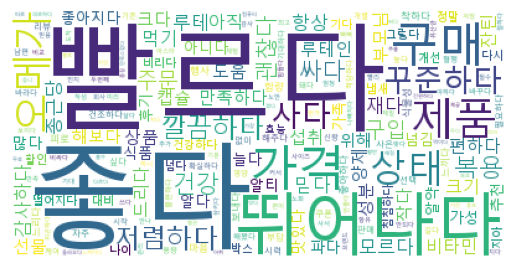

In [19]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis('off') 
plt.show()

##### 문장을 합쳐서 계산할때 

In [20]:
# 단어로 쪼개기 
text_split = combined_text.split()

In [21]:
# counter를 이용해서 중복 여부 count
from collections import Counter
Counter(text_split)

Counter({'좋다': 39217,
         '몇번': 96,
         '알다': 1340,
         '꾸준하다': 7362,
         '재다': 2863,
         '모르다': 3129,
         '안좋다': 421,
         '녹내장': 42,
         '통증': 44,
         '덜하다': 425,
         '피로하다': 417,
         '아직': 2519,
         '느끼다': 859,
         '여러가지': 261,
         '의무': 10,
         '먹고다': 113,
         '유명하다': 181,
         '만들다': 226,
         '믿다': 3379,
         '근데': 353,
         '가격': 13870,
         '비싸다': 541,
         '나빠지다': 456,
         '위해': 1599,
         '열심': 22,
         '사제품': 87,
         '조율': 6,
         '해주다': 797,
         '제품': 10795,
         '싸다': 5812,
         '지인': 369,
         '추천': 1295,
         '뻑뻑': 502,
         '항상': 2950,
         '트리': 132,
         '건조하다': 848,
         '좋아지다': 1516,
         '감사하다': 3303,
         '느리다': 914,
         '기본': 156,
         '걸리다': 339,
         '달기': 5,
         '늦다': 327,
         '구성': 245,
         '성분': 1670,
         '루테': 3534,
         '지아': 1011,
         '잔틴': 1988,


In [22]:
# 한글 폰트 경로 설정 (Windows 환경에 맞게 경로 수정)
font_path = 'C:/Windows/Fonts/malgun.ttf'

wordCloud = WordCloud(font_path=font_path, background_color='white') #인스턴스화 
wordCloud.generate_from_text(combined_text)

In [23]:
# count 
wordCloud.words_ 

{'빨르다 뛰어나다': 1.0,
 '뛰어나다 빨르다': 0.251239328008813,
 '상태 깔끔하다': 0.22796750206554667,
 '좋다 빨르다': 0.20386945744973836,
 '깔끔하다 좋다': 0.17643211236573947,
 '싸다 사다': 0.13835720187276232,
 '좋다 좋다': 0.13309005783530709,
 '사다 빨르다': 0.12820159735610026,
 '가격 싸다': 0.12362296887909667,
 '가격 괜찮다': 0.10059212338198843,
 '좋다 상태': 0.09098733131368769,
 '좋다 가격': 0.07246626273753787,
 '뛰어나다 좋다': 0.07088267694849903,
 '구매 빨르다': 0.06527127513081796,
 '주문': 0.062310658220875795,
 '빨르다 가격': 0.05511567061415588,
 '양제': 0.0486780501239328,
 '좋다 제품': 0.04754199944918755,
 '가격 저렴하다': 0.046922335444781055,
 '빨르다 빨르다': 0.04606169099421647,
 '저렴하다 구매': 0.04568300743596805,
 '꾸준하다 복용': 0.04451253098320022,
 '빨르다 좋다': 0.04341090608647755,
 '괜찮다 빨르다': 0.04265353896998072,
 '감사하다 빨르다': 0.04134535940512256,
 '좋다 구매': 0.04055356651060314,
 '뛰어나다 오메가': 0.04055356651060314,
 '루테인': 0.04007160561828697,
 '제품 좋다': 0.03952079316992564,
 '먹기 편하다': 0.03525199669512531,
 '건강 위해': 0.03504544202698981,
 '저렴하다 가격': 0.034391352244560

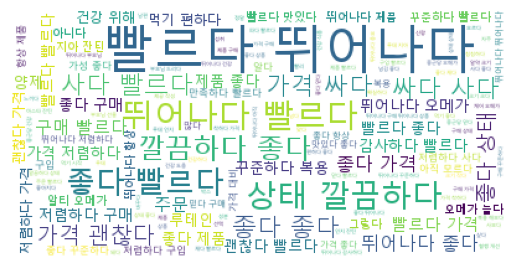

In [24]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off') 
plt.show()

### 여기부터 LDA

#### negative 
- 별점 1,2,3

In [1]:
import pandas as pd

In [2]:
# negative = df_eyes['review_star'] <= 3 
# df_eyes_negative = df_eyes[negative]

In [3]:
# df_eyes_negative.to_csv('./eyes_negative.csv')

In [4]:
# positive = df_eyes['review_star'] > 3 
# df_eyes_positive = df_eyes[positive]

In [5]:
# df_eyes_positive.to_csv('./eyes_positive.csv')

In [6]:
df_eyes_negative = pd.read_csv('./eyes_negative.csv')

In [7]:
from gensim.corpora import Dictionary

In [8]:
type(df_eyes_negative['replaced_review'])

pandas.core.series.Series

In [9]:
# 'replaced_review' 열의 모든 값을 문자열로 변환
df_eyes_negative['replaced_review'] = df_eyes_negative['replaced_review'].astype(str)

In [10]:
negative_review = df_eyes_negative['replaced_review'].apply(lambda x: x.split()).values

In [11]:
negative_review

array([list(['비싸다', '느리다', '기본', '걸리다', '달기', '늦다']),
       list(['캡슐', '특유', '냄새', '나서다', '먹기', '힘들다', '넘김', '좋다', '억지로', '복용', '실패하다', '도저히', '비리', '냄새', '나서다', '건강', '위해', '도저히', '박스', '차다', '막막하다']),
       list(['캡슐', '커서', '캡슐', '넘기다', '어렵다', '먹기', '힘들다', '빼다', '아직', '모르다', '루테', '오메가', '늘다', '건강', '도움', '모르다']),
       ..., list(['상태', '깔끔하다', '좋다', '숫자', '착각', '비싸다', '편입']),
       list(['느리다', '뛰어나다', '로젠택배', '상품', '구매']), list(['그렇다'])],
      dtype=object)

In [12]:
dictionary = Dictionary(negative_review)
dictionary

In [13]:
dictionary.doc2bow(negative_review[3])

[(19, 1), (28, 1), (34, 1), (35, 2), (36, 1)]

In [14]:
# dictionary에 의한 한글 문장을 벡터화 변환
corpus_list = list()
for sentence in negative_review :
  vectors = dictionary.doc2bow(sentence)
  corpus_list.append(vectors)

In [15]:
df_eyes_negative['문장벡터화'] = corpus_list

##### 토픽 잡기


In [16]:
from gensim.models import LdaModel

In [17]:
lda_model = LdaModel(corpus=corpus_list, id2word=dictionary, num_topics=7)

In [21]:
lda_model.print_topics(num_words=7)

[(0,
  '0.074*"좋다" + 0.059*"상태" + 0.032*"제품" + 0.028*"구매" + 0.023*"깔끔하다" + 0.021*"꾸준하다" + 0.017*"느리다"'),
 (1,
  '0.024*"제품" + 0.020*"좋다" + 0.019*"구매" + 0.018*"빨르다" + 0.017*"가격" + 0.017*"주문" + 0.017*"상품"'),
 (2,
  '0.089*"가격" + 0.087*"괜찮다" + 0.070*"빨르다" + 0.019*"좋다" + 0.018*"오메가" + 0.017*"사다" + 0.014*"복용"'),
 (3,
  '0.050*"빨르다" + 0.043*"좋다" + 0.032*"가격" + 0.030*"구매" + 0.025*"싸다" + 0.020*"사다" + 0.019*"저렴하다"'),
 (4,
  '0.039*"제품" + 0.019*"먹이다" + 0.013*"좋다" + 0.013*"크기" + 0.012*"체험" + 0.012*"먹기" + 0.012*"구매"'),
 (5,
  '0.065*"좋다" + 0.049*"빨르다" + 0.022*"모르다" + 0.021*"구매" + 0.021*"상태" + 0.020*"아직" + 0.019*"제품"'),
 (6,
  '0.044*"가격" + 0.029*"괜찮다" + 0.028*"빨르다" + 0.026*"아직" + 0.023*"복용" + 0.023*"제품" + 0.019*"모르다"')]

###### 최적 토픽 추출하기 

In [22]:
sentences = df_eyes_negative['replaced_review']
sentences

0                                    비싸다 느리다 기본 걸리다 달기 늦다
1       캡슐 특유 냄새 나서다 먹기 힘들다 넘김 좋다 억지로 복용 실패하다 도저히 비리 냄...
2       캡슐 커서 캡슐 넘기다 어렵다 먹기 힘들다 빼다 아직 모르다 루테 오메가 늘다 건강...
3                                      제품 시력 좋다 지다 제품 모르다
4                                    비싸다 느리다 기본 걸리다 달기 늦다
                              ...                        
2756                                빨르다 뛰어나다 타입 먹기 편하다 단점
2757                              느리다 뛰어나다 상품 복용 만족하다 불만족
2758                              상태 깔끔하다 좋다 숫자 착각 비싸다 편입
2759                                  느리다 뛰어나다 로젠택배 상품 구매
2760                                                  그렇다
Name: replaced_review, Length: 2761, dtype: object

In [23]:
# 각 문장을 공백으로 나누어 리스트에 저장
tokenized_sentences = [sentence.split() for sentence in sentences]

In [24]:
# 결과 출력
morphs_list = list()
for tokens in tokenized_sentences:
    morphs_list.append(tokens)
morphs_list

[['비싸다', '느리다', '기본', '걸리다', '달기', '늦다'],
 ['캡슐',
  '특유',
  '냄새',
  '나서다',
  '먹기',
  '힘들다',
  '넘김',
  '좋다',
  '억지로',
  '복용',
  '실패하다',
  '도저히',
  '비리',
  '냄새',
  '나서다',
  '건강',
  '위해',
  '도저히',
  '박스',
  '차다',
  '막막하다'],
 ['캡슐',
  '커서',
  '캡슐',
  '넘기다',
  '어렵다',
  '먹기',
  '힘들다',
  '빼다',
  '아직',
  '모르다',
  '루테',
  '오메가',
  '늘다',
  '건강',
  '도움',
  '모르다'],
 ['제품', '시력', '좋다', '지다', '제품', '모르다'],
 ['비싸다', '느리다', '기본', '걸리다', '달기', '늦다'],
 ['캡슐',
  '특유',
  '냄새',
  '나서다',
  '먹기',
  '힘들다',
  '넘김',
  '좋다',
  '억지로',
  '복용',
  '실패하다',
  '도저히',
  '비리',
  '냄새',
  '나서다',
  '건강',
  '위해',
  '도저히',
  '박스',
  '차다',
  '막막하다'],
 ['캡슐',
  '커서',
  '캡슐',
  '넘기다',
  '어렵다',
  '먹기',
  '힘들다',
  '빼다',
  '아직',
  '모르다',
  '루테',
  '오메가',
  '늘다',
  '건강',
  '도움',
  '모르다'],
 ['제품', '시력', '좋다', '지다', '제품', '모르다'],
 ['상품', '좋다', '근데', '캡슐', '가격', '비싸다'],
 ['제품',
  '복용',
  '해보다',
  '알다',
  '완존',
  '파이',
  '도착',
  '도서',
  '산간',
  '지방도',
  '아니다',
  '지난',
  '도착',
  '별다르다',
  '통보',
  '지연',
  '달랑',
  '상투',
  '문구',
  '제주',
  '

In [25]:
preprocessed_sentences = morphs_list

In [26]:
dictionary_sentences = Dictionary(preprocessed_sentences) # fix in like sklean
dictionary_sentences

In [27]:
from gensim.models.coherencemodel import CoherenceModel

In [28]:
start_topic = 2
end_topic = 10
coherence_scores = list()
perplexity_scores = list()
for topic_number in range(start_topic, end_topic+1):
    best_lda_model = LdaModel(corpus=corpus_list, id2word=dictionary_sentences, num_topics=topic_number) # fix
    coherenceModel = CoherenceModel(model=best_lda_model, texts=morphs_list, dictionary=dictionary_sentences)
    coherence_scores.append(coherenceModel.get_coherence()) # 일관성 점수
    perplexity_scores.append(best_lda_model.log_perplexity(corpus_list))

In [29]:
import pandas as pd
scores = pd.DataFrame([coherence_scores,  perplexity_scores]).T
scores

,0,1
0,0.296365,-6.547629
1,0.343414,-6.619846
2,0.360680,-6.696814
3,0.341718,-6.753390
4,0.324487,-6.805252
5,0.320592,-6.843940
6,0.333746,-6.882257
7,0.316014,-6.937788
8,0.303778,-6.990928


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opti

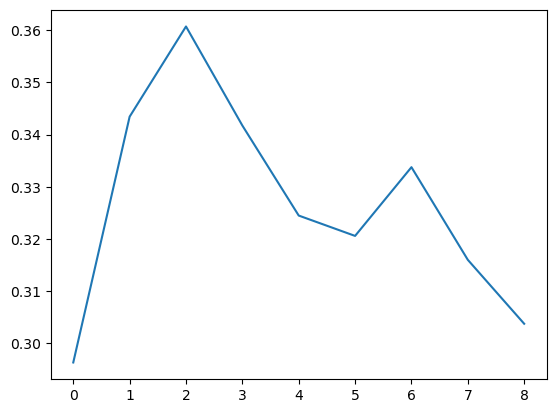

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opti

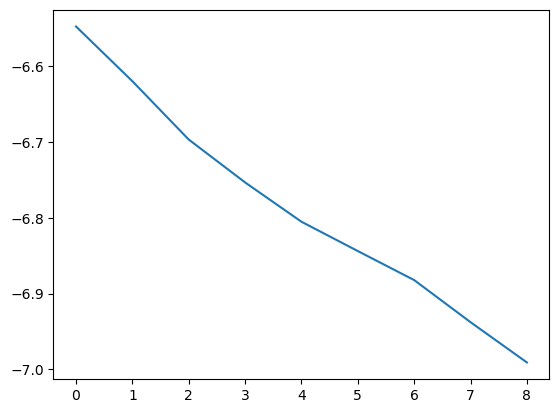

In [31]:
sns.lineplot(coherence_scores)
plt.show()
sns.lineplot(perplexity_scores)
plt.show()

##### LDA 시각화(review_negative)

In [32]:
# %pip install --user pyLDAvis

In [33]:
# !pip install gensim

In [34]:
# !pip show pyLDAvis

In [35]:
import pyLDAvis.gensim_models

In [61]:
lda_model = LdaModel(corpus=corpus_list, id2word=dictionary, num_topics=3)

In [62]:
lda_model.print_topics(num_words=4)

[(0, '0.026*"좋다" + 0.020*"구매" + 0.019*"느리다" + 0.016*"구입"'),
 (1, '0.061*"좋다" + 0.054*"가격" + 0.040*"괜찮다" + 0.035*"빨르다"'),
 (2, '0.053*"빨르다" + 0.037*"상태" + 0.022*"제품" + 0.022*"모르다"')]

In [63]:
negative_topic=lda_model.print_topics(num_words=4)

In [64]:
type(negative_topic)

list

In [65]:
df_negative_topic=pd.DataFrame(data=negative_topic)

In [66]:
df_negative_topic.to_excel('./negative_topic.xlsx')

In [67]:
pyLDAvis.enable_notebook() # 일반적인 python에선 불필요
result_visualized = pyLDAvis.gensim_models.prepare(lda_model, corpus_list, dictionary)

In [68]:
pyLDAvis.display(result_visualized)

In [70]:
# project_nutrients_review_negative_result_visualized.html
pyLDAvis.save_html(result_visualized, './eyes_review_negative_result_visualized.html')

#### positive
- 별점 4, 5

In [39]:
df_eyes_positive = pd.read_csv('./eyes_positive.csv')

In [40]:
# 'replaced_review' 열의 모든 값을 문자열로 변환
df_eyes_positive['replaced_review'] = df_eyes_positive['replaced_review'].astype(str)

In [41]:
positive_review = df_eyes_positive['replaced_review'].apply(lambda x: x.split()).values

In [42]:
positive_dictionary = Dictionary(positive_review)
positive_dictionary

In [43]:
positive_dictionary.doc2bow(positive_review[10])

[(3, 2),
 (13, 2),
 (26, 2),
 (27, 1),
 (29, 1),
 (32, 1),
 (34, 1),
 (35, 1),
 (42, 2),
 (48, 1),
 (49, 1),
 (59, 1),
 (68, 1),
 (74, 5),
 (75, 1),
 (93, 4),
 (94, 3),
 (95, 1),
 (109, 2),
 (126, 2),
 (128, 1),
 (133, 3),
 (139, 1),
 (140, 1),
 (142, 1),
 (146, 5),
 (158, 4),
 (166, 2),
 (169, 1),
 (170, 1),
 (173, 2),
 (193, 1),
 (195, 1),
 (196, 1),
 (197, 1),
 (198, 5),
 (199, 1),
 (200, 1),
 (201, 1),
 (202, 1),
 (203, 1),
 (204, 1),
 (205, 1),
 (206, 1),
 (207, 1),
 (208, 1),
 (209, 1),
 (210, 1),
 (211, 1),
 (212, 1),
 (213, 1),
 (214, 1),
 (215, 1),
 (216, 1),
 (217, 2),
 (218, 1),
 (219, 1),
 (220, 1),
 (221, 1),
 (222, 1),
 (223, 1),
 (224, 1),
 (225, 1),
 (226, 1),
 (227, 1),
 (228, 1),
 (229, 1),
 (230, 1),
 (231, 1),
 (232, 1),
 (233, 1),
 (234, 1),
 (235, 1),
 (236, 1),
 (237, 2)]

In [44]:
# dictionary에 의한 한글 문장을 벡터화 변환
corpus_list_pos = list()
for sentence in positive_review :
  vectors = positive_dictionary.doc2bow(sentence)
  corpus_list_pos.append(vectors)

In [45]:
df_eyes_positive['문장벡터화'] = corpus_list_pos

##### 토픽잡기

In [46]:
lda_model_pos = LdaModel(corpus=corpus_list_pos, id2word=positive_dictionary, num_topics=4)

In [47]:
lda_model_pos.print_topics(num_words=4)

[(0, '0.242*"빨르다" + 0.227*"뛰어나다" + 0.091*"좋다" + 0.026*"구매"'),
 (1, '0.166*"좋다" + 0.079*"상태" + 0.070*"깔끔하다" + 0.041*"구매"'),
 (2, '0.028*"오메가" + 0.021*"루테" + 0.019*"건강" + 0.018*"제품"'),
 (3, '0.156*"가격" + 0.131*"사다" + 0.109*"빨르다" + 0.098*"싸다"')]

###### 최적 토픽 잡기_긍정

In [48]:
sentences_pos = df_eyes_positive['replaced_review']
sentences_pos

0                                           좋다 몇번 알다
1                 꾸준하다 재다 모르다 안좋다 녹내장 통증 덜하다 좋다 피로하다
2        아직 느끼다 여러가지 좋다 의무 먹고다 유명하다 만들다 믿다 근데 가격 비싸다
3              나빠지다 위해 열심 사제품 비싸다 가격 조율 해주다 좋다 제품 싸다
4                                           지인 추천 뻑뻑
                            ...                     
61342                                       빨르다 뛰어나다
61343                                       빨르다 뛰어나다
61344                                       빨르다 뛰어나다
61345                                       빨르다 뛰어나다
61346                                       빨르다 뛰어나다
Name: replaced_review, Length: 61347, dtype: object

In [49]:
# 각 문장을 공백으로 나누어 리스트에 저장
tokenized_sentences_pos = [sentence.split() for sentence in sentences_pos]

In [50]:
# 결과 출력
morphs_list_pos = list()
for tokens in tokenized_sentences_pos:
    morphs_list_pos.append(tokens)
morphs_list_pos

[['좋다', '몇번', '알다'],
 ['꾸준하다', '재다', '모르다', '안좋다', '녹내장', '통증', '덜하다', '좋다', '피로하다'],
 ['아직',
  '느끼다',
  '여러가지',
  '좋다',
  '의무',
  '먹고다',
  '유명하다',
  '만들다',
  '믿다',
  '근데',
  '가격',
  '비싸다'],
 ['나빠지다', '위해', '열심', '사제품', '비싸다', '가격', '조율', '해주다', '좋다', '제품', '싸다'],
 ['지인', '추천', '뻑뻑'],
 ['항상', '트리', '좋다'],
 ['건조하다', '좋아지다'],
 ['감사하다'],
 ['구성',
  '성분',
  '루테',
  '지아',
  '잔틴',
  '오메가',
  '알맞다',
  '배합',
  '제품',
  '루테인',
  '마리',
  '골드',
  '성분',
  '망막',
  '황반',
  '구성',
  '성분',
  '루테인',
  '황색',
  '채소',
  '과일',
  '영양소',
  '블루베리',
  '좋다',
  '성분',
  '강력하다',
  '항산화',
  '좋다',
  '식품',
  '당근',
  '연어',
  '루테인',
  '지아',
  '잔틴',
  '똑같다',
  '효능',
  '황반',
  '색소',
  '밀도',
  '높이다',
  '효능',
  '아스타',
  '잔틴',
  '피로',
  '도르다',
  '개선',
  '루테',
  '인지',
  '잔틴',
  '복합',
  '추출',
  '비타민',
  '셀레늄',
  '캡슐',
  '캡슐',
  '건강',
  '식품',
  '인증',
  '우수',
  '건강',
  '식품',
  '기준',
  '인증',
  '제품',
  '섭취',
  '이유',
  '황반',
  '망막',
  '가장',
  '안쪽',
  '세포',
  '밀집',
  '선명하다',
  '정확하다',
  '받아들이다',
  '사진기',
  '필름',
  '역할',
  '황반',
  '색소'

In [51]:
preprocessed_sentences = morphs_list_pos

In [52]:
dictionary_sentences = Dictionary(preprocessed_sentences) # fix in like sklean
dictionary_sentences

In [53]:
start_topic = 2
end_topic = 10
coherence_scores = list()
perplexity_scores = list()
for topic_number in range(start_topic, end_topic+1):
    best_pos_lda_model = LdaModel(corpus=corpus_list_pos, id2word=dictionary_sentences, num_topics=topic_number) # fix
    coherenceModel = CoherenceModel(model=best_pos_lda_model, texts=morphs_list_pos, dictionary=dictionary_sentences)
    coherence_scores.append(coherenceModel.get_coherence()) # 일관성 점수
    perplexity_scores.append(best_pos_lda_model.log_perplexity(corpus_list_pos))

In [54]:
scores_pos = pd.DataFrame([coherence_scores,  perplexity_scores]).T
scores_pos

,0,1
0,0.440864,-5.887698
1,0.565445,-5.825713
2,0.564927,-5.858980
3,0.590811,-5.901811
4,0.579927,-5.939252
5,0.608977,-5.985714
6,0.562600,-6.011514
7,0.556504,-6.095489
8,0.545826,-6.201483


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opti

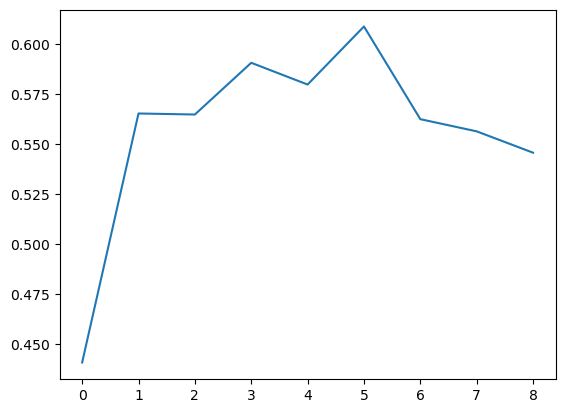

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opti

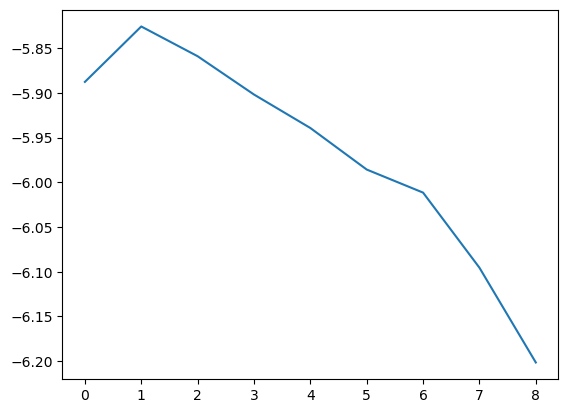

In [55]:
sns.lineplot(coherence_scores)
plt.show()
sns.lineplot(perplexity_scores)
plt.show()

In [77]:
pos_lda_model = LdaModel(corpus=corpus_list_pos, id2word=dictionary_sentences, num_topics=3)

In [86]:
positive_topic=pos_lda_model.print_topics(num_words=4)

In [79]:
pyLDAvis.enable_notebook() # 일반적인 python에선 불필요
result_visualized = pyLDAvis.gensim_models.prepare(pos_lda_model, corpus_list_pos, dictionary_sentences)

In [88]:
df_positive_topic=pd.DataFrame(data=positive_topic)

In [89]:
df_positive_topic.to_excel('./positive_topic.xlsx')

In [80]:
pyLDAvis.display(result_visualized)

In [81]:
# project_nutrients_review_negative_result_visualized.html
pyLDAvis.save_html(result_visualized, './eyes_review_positive_result_visualized.html')